# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')


df= pd.read_csv("/content/drive/MyDrive/MyLearning/Loan_Modelling.csv")

Mounted at /content/drive


In [4]:
#Lets take a copy of the original data

data1  = df.copy()

## Data Overview

In [5]:
#Check if dataset is loaded properly
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [7]:
#Validate the number of records and columns
df.shape

(5000, 14)

**Observation**


*   Dataset has been loaded properly
*   Dataset has 5000 records with 14 columns.
*   Dataset displays customer data of All Life US Bank. The Avg credit card  spending, existing mortgage details, security deposit details are displayed in the dataset.  
*   Dataset displays customer personal loan prefernce from the last compaign as well.







In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
df.duplicated().sum()

0

**Observation**



*   Dataset has 13 int type fields and 1 float type field.CCAvg is the only field which is of type float

*   Dataset does not have any null values in any columns.

*   Dataset has no duplicates in any column.






**Statistical Summary**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observations**


Dataset has customers with a min age of 23 and max age of 67. 75 % of the customers have an age range of 55

Dataset has customers with a large varying experience. Min experience is -3 which could be a data issue. However 75 % of the customers have 30 years of exp.with a max of 43 as well. Mean and Median are near about 20 yrs of experience.

Dataset has customers with min income of 8K  and max income of 224K.
There could be potential outliers in this data by observing the max income.
However the mean income is 73K and median is 64KUSD

Dataset has customers with a min family count of 1 and max family count of 4.
75% of the data has family count of 3.

Dataset has customers with a min credit spending of zero and a max spending of  10K.75% of the data has a credit card spending of 2.5K. Median spending is 1.5K and mean is 1.9K.

Dataset has customers with a min graduate level of 1.
75% of the data has education level of 3.

Dataset has customers with no mortgage at all.But there are customers
with a high mortgage of 635K as well.There could be potential outliers in this field.

Dataset has customers with Personal loan from the bank.
75% of the data has no personal loan from the bank.

Dataset has customers with Securities_Account and CD_Account from the bank.
75%  of the data has no securities account and CD_Account with the bank.

Dataset has customers with online banking facilities.
75% of the data uses online banking facilities.

Dataset has customers with credit bank from other banks.
About 75 % of the data has customers using credit card from other banks.







## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

**Missing value treatment/correction**

We did see some negative values in the Experience column which may need correction. Lets look at unqiue counts of all values to see if there are any more anamolies

In [10]:
#Lets find out how many unique values are present in each column

for value in df:
    print('For {},{} unique values present'.format(value,df[value].nunique()))

For ID,5000 unique values present
For Age,45 unique values present
For Experience,47 unique values present
For Income,162 unique values present
For ZIPCode,467 unique values present
For Family,4 unique values present
For CCAvg,108 unique values present
For Education,3 unique values present
For Mortgage,347 unique values present
For Personal_Loan,2 unique values present
For Securities_Account,2 unique values present
For CD_Account,2 unique values present
For Online,2 unique values present
For CreditCard,2 unique values present


In [11]:
#Lets find out value counts values are present in each column

for value in df:
    print('For {},{} unique values present'.format(value,df[value].value_counts()))

For ID,1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
5000    1
Name: ID, Length: 5000, dtype: int64 unique values present
For Age,35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
45    127
60    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
67     12
23     12
Name: Age, dtype: int64 unique values present
For Experience, 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    1

**Observations**

We can see some anamolies in Experience field with some negative values.

Fields like Education, Personal loan,Securities_Account, CD_Account,Online, CreditCard can be  considered to convert to categorical variables.

The ZipCode field can be generalized further so that it can be converted as a categorical field as well. Generalizing the field helps build a better model as well.

In [14]:
# Correcting the experience values. The negative values were in the records for customers with less Age group. This could be a mistake, thereofore correcting by replacing the signs
df["Experience"].replace(-1, 1, inplace=True)
df["Experience"].replace(-2, 2, inplace=True)
df["Experience"].replace(-3, 3, inplace=True)

In [15]:
df["ZIPCode"] = df["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    df["ZIPCode"].str[0:2].nunique(),
)
df["ZIPCode"] = df["ZIPCode"].str[0:2]

df["ZIPCode"] = df["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [16]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91,4,1.0,2,0,0,0,0,0,1


**Observation**

ZipCode field has been converted to a substring of 2

In [17]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
df[cat_cols] = df[cat_cols].astype("category")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 308.8 KB


**Observation**

Following Fields(ZipCode, Education, Personal loan, Securities_Account, CD_Account, Online and CreditCard ) have been converted to categorical .

Let's look at our outliers when we do EDA and treat them if needed.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

***Analysis of Age Vs Experience,Education, Mortgage and Security Account***

In [19]:
#Lets analyse further on Age 23 to 29 based on Education and Experience
df_groupby_age_education = df[(df['Age'] >= 23) & (df['Age'] <= 29)].groupby(['Age','Education'])['Experience']

In [20]:
df_groupby_age_education.value_counts()

Age  Education  Experience
23   1          1              6
                3              1
     2          2              4
                3              1
24   1          0              8
                2              4
                1              1
     2          1              5
                0              2
                2              1
     3          2              4
                3              2
                0              1
25   1          1             20
                0              3
     2          0              6
                1              5
     3          1             10
                0              8
                2              1
26   1          2             19
                0              6
                1              5
     2          1             10
                0              9
                2              5
     3          0             13
                1              8
                2              3
27   1          

In [21]:
#Lets analyse further on Age 29 to 40 based on Education and Experience
df_groupby_age_education = df[(df['Age'] > 29) & (df['Age'] <= 40)].groupby(['Age','Education'])['Experience']

In [22]:
df_groupby_age_education.value_counts()

Age  Education  Experience
30   1          6             20
                4             19
                5             14
     2          4             15
                5             14
                6             12
                3              7
     3          5             12
                6             12
                4             10
                0              1
31   1          5             21
                6             15
                7             15
     2          5             18
                7             12
                4              7
                6              4
     3          5             15
                7             10
                1              5
                6              3
32   1          7             25
                6             19
                8             16
     2          8             12
                7             11
                6              8
                5              3
     3          

In [23]:
#Lets analyse further on Age 23 to 29 based on Education and Experience
df_groupby_age_education_experience = df[(df['Age'] >= 23) & (df['Age'] <= 29)].groupby(['Age','Education','Experience'])['Mortgage']

In [24]:
df_groupby_age_education_experience.value_counts()

Age  Education  Experience  Mortgage
23   1          1           0           2
                            84          1
                            90          1
                            239         1
                            305         1
                                       ..
29   3          4           110         1
                            612         1
                5           0           4
                            94          1
                            119         1
Name: Mortgage, Length: 209, dtype: int64

In [25]:
#Lets analyse further on Age 29 to 40 based on Education and Experience
df_groupby_age_education_experience = df[(df['Age'] > 29) & (df['Age'] <= 40)].groupby(['Age','Education','Experience'])['Mortgage']

In [26]:
df_groupby_age_education_experience.value_counts()

Age  Education  Experience  Mortgage
30   1          4           0           14
                            85           1
                            109          1
                            172          1
                            207          1
                                        ..
40   3          15          102          1
                            107          1
                            113          1
                16          0            8
                            158          1
Name: Mortgage, Length: 551, dtype: int64

In [27]:
#Lets analyse further on Age 23 to 29 based on Education and Experience
df_groupby_age_education_experience = df[(df['Age'] >= 23) & (df['Age'] <= 29)].groupby(['Age','Education','Experience'])['Securities_Account']

In [28]:
df_groupby_age_education_experience.value_counts()

Age  Education  Experience  Securities_Account
23   1          1           0                      5
                            1                      1
                3           0                      1
                            1                      0
     2          2           0                      3
                            1                      1
                3           0                      1
                            1                      0
24   1          0           0                      8
                            1                      0
                1           0                      1
                            1                      0
                2           0                      2
                            1                      2
     2          0           0                      1
                            1                      1
                1           0                      5
                            1                      0

In [29]:
#Lets analyse further on Age 29 to 40 based on Education and Experience
df_groupby_age_education_experience = df[(df['Age'] > 29) & (df['Age'] <= 40)].groupby(['Age','Education','Experience'])['Securities_Account']

In [30]:
df_groupby_age_education_experience.value_counts()

Age  Education  Experience  Securities_Account
30   1          4           0                     18
                            1                      1
                5           0                     12
                            1                      2
                6           0                     18
                                                  ..
40   3          14          1                      2
                15          0                     10
                            1                      0
                16          0                      9
                            1                      0
Name: Securities_Account, Length: 242, dtype: int64

In [31]:
#Lets analyse further on Age 40 to 68 based on Education and Experience
df_groupby_age_education_experience = df[(df['Age'] > 40) & (df['Age'] <= 68)].groupby(['Age','Education','Experience'])['Securities_Account']

In [32]:
df_groupby_age_education_experience.value_counts()

Age  Education  Experience  Securities_Account
41   1          15          0                      9
                            1                      1
                16          0                     14
                            1                      1
                17          0                     29
                                                  ..
67   2          43          1                      0
     3          41          0                      1
                            1                      1
                42          0                      2
                            1                      0
Name: Securities_Account, Length: 566, dtype: int64

**Observations**


*   Dataset has different Age groups ranging from 23 to 67 years of age.
*   There are customers holding mortgages with bank among all age groups.
*   There are customers holding security account with the bank among all age groups.But most of the customers regardless of age/experience do not have a security account.
*   There are several young cutomers whose education level ranges from Undergrad,Grad to Advanced. However number of years in experience for Age group ranging from 23 to 29 is between 1 to 5 years of experience.
*   Experience seems to be directly proportional to the Age when analysing all age groups.




**Univariate Analysis**

In [33]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [34]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Age

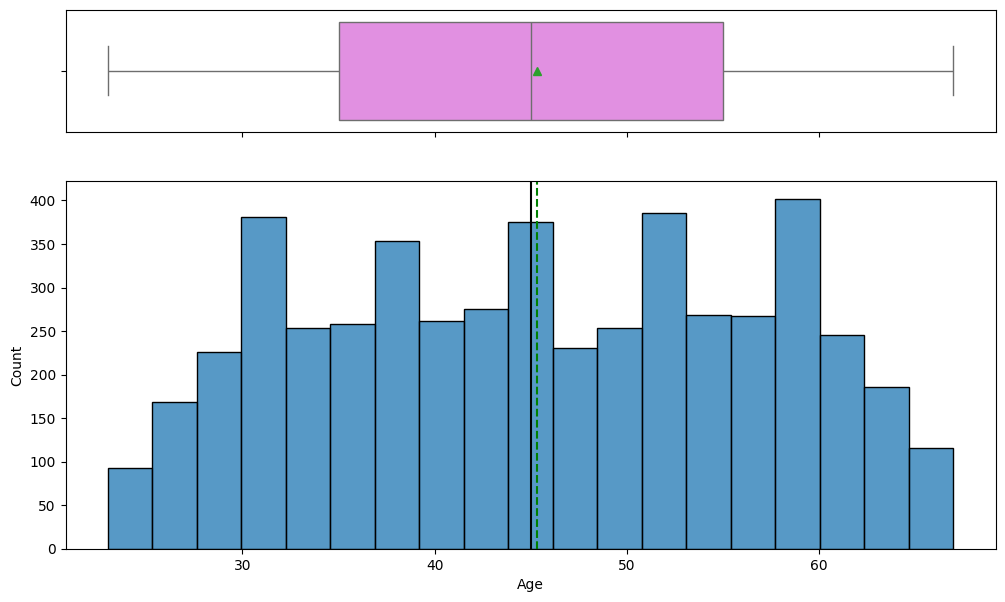

In [34]:
histogram_boxplot(df, "Age")

#### Observations on Experience

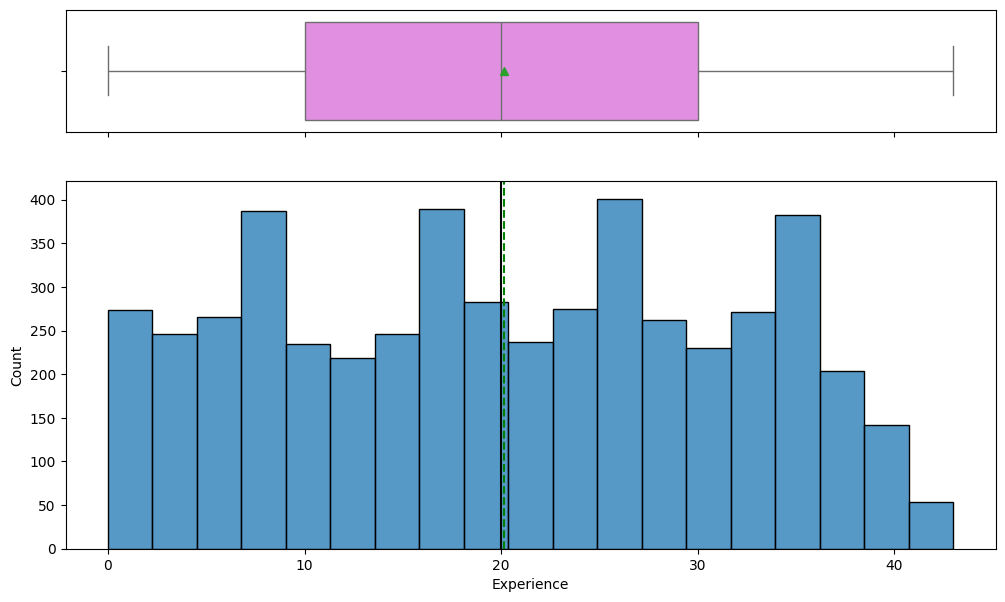

In [35]:
histogram_boxplot(df, "Experience")

#### Observations on Income

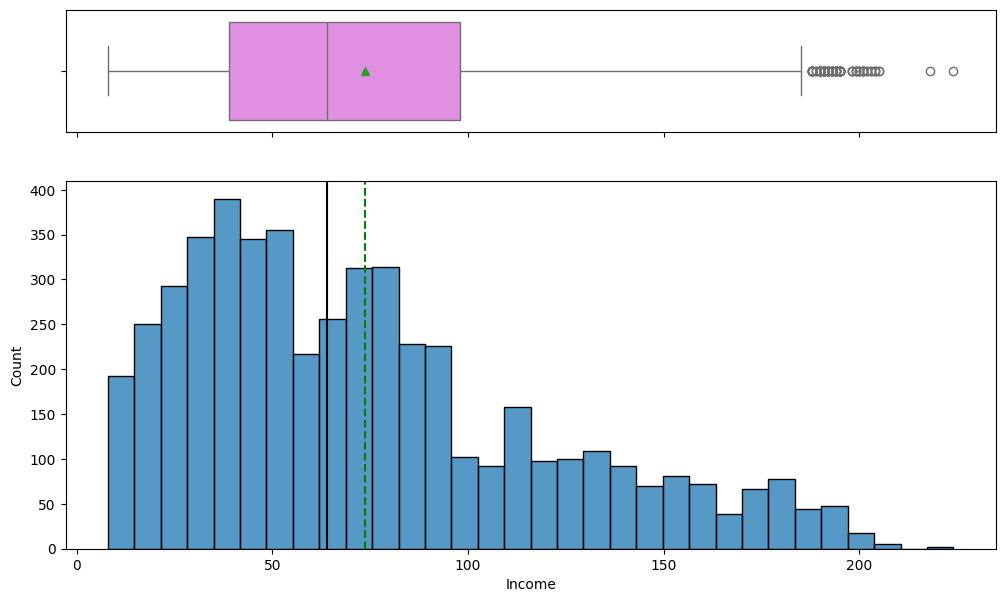

In [36]:
histogram_boxplot(df, "Income")

#### Observations on CCAvg

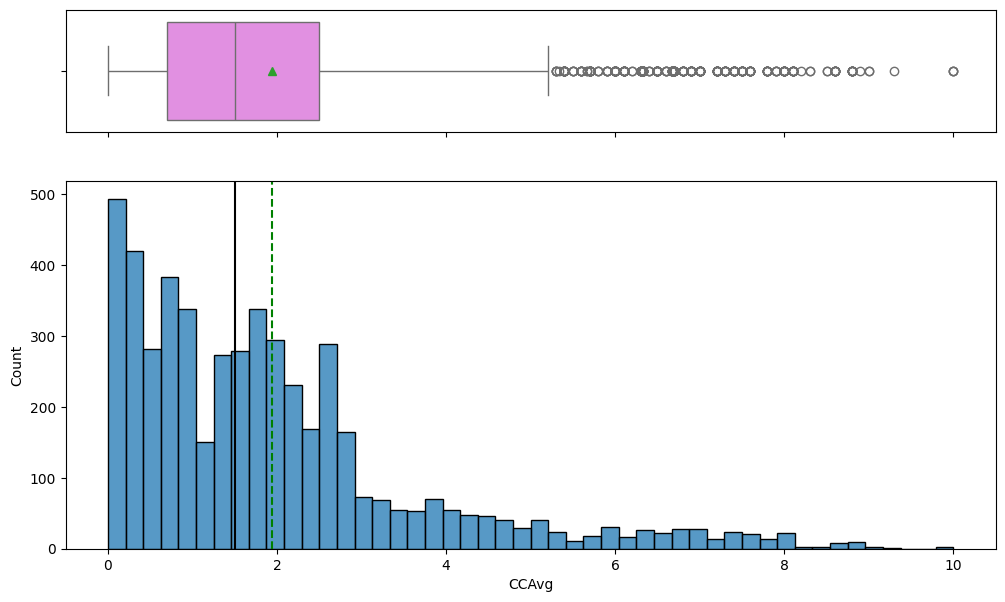

In [37]:
histogram_boxplot(df, "CCAvg")

#### Observations on Mortgage

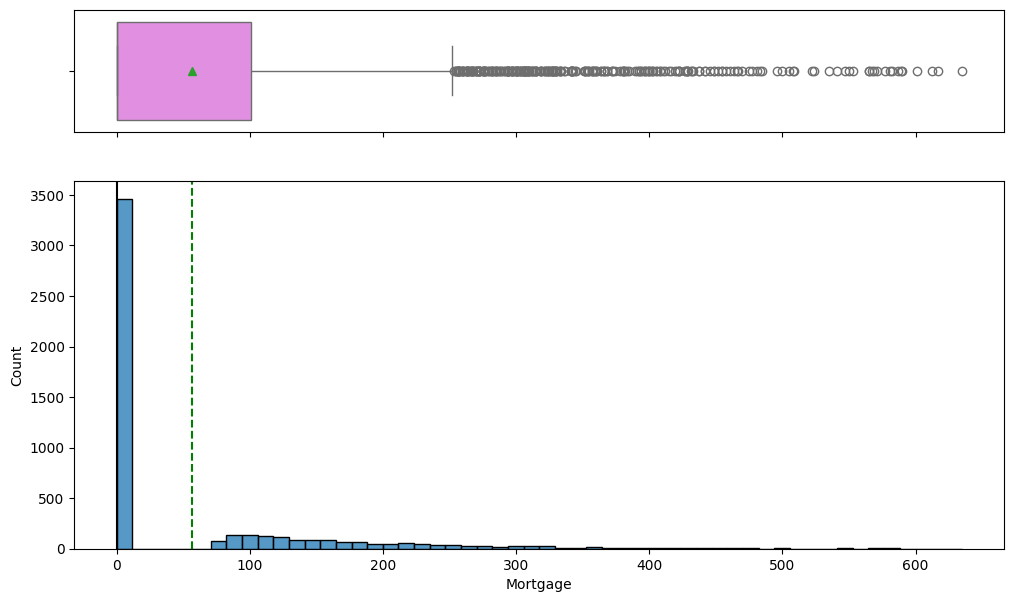

In [38]:
histogram_boxplot(df, "Mortgage")

**Observations from box plot and bar graphs -Univariate Analysis**



* Age and Experience column seems to be a normal distribution. As we have seen before, Age & experience seems to be directly proptional to each other.
* Income seems to be rightly skewed with a difference in mean & mean incomes.There are outliers seen in the boxplot which can be treated.

* CCAvg seems to be rightly skewed with a difference in mean & median CCAvg. There are outliers seen in the box plot which can be treated.

* Mortgage seems to be highly right skewed with a lot of outliers as seen in the box plot which can be treated.





#### Observations on Family

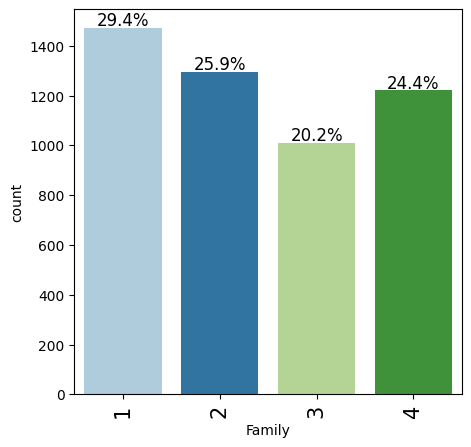

In [39]:
labeled_barplot(df, "Family", perc=True)

#### Observations on Education

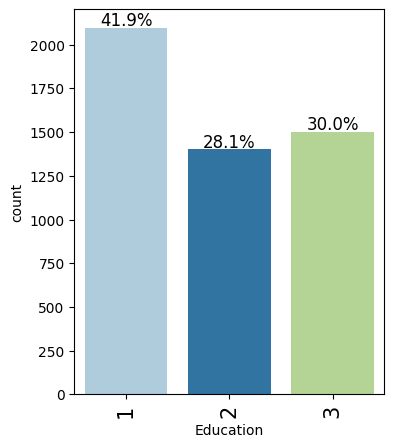

In [40]:
labeled_barplot(df, "Education", perc=True)

#### Observations on Securities_Account

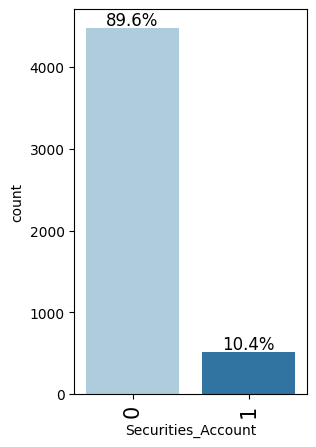

In [41]:
labeled_barplot(df, "Securities_Account", perc=True)

#### Observations on CD_Account

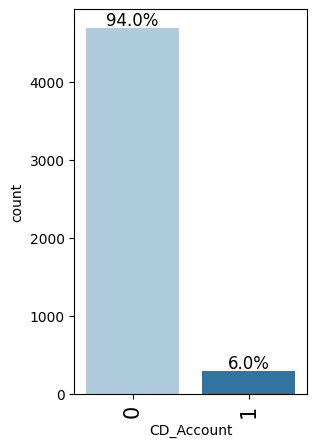

In [42]:
labeled_barplot(df, "CD_Account", perc=True)

#### Observations on Online

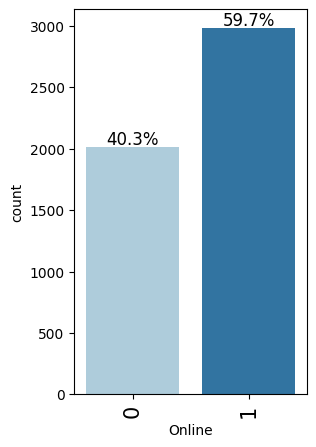

In [43]:
labeled_barplot(df, "Online", perc=True)

#### Observation on CreditCard

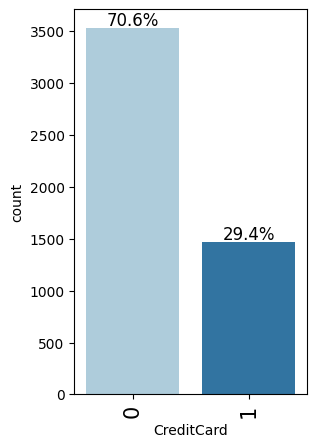

In [44]:
labeled_barplot(df, "CreditCard", perc=True)

#### Observation on ZIPCode

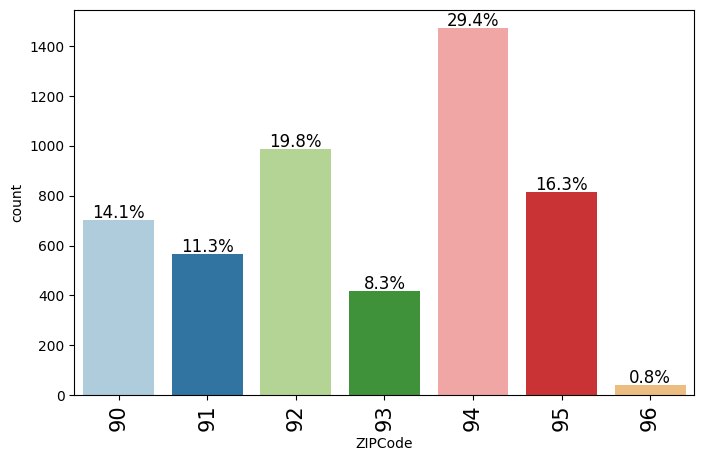

In [45]:
labeled_barplot(df, "ZIPCode", perc=True)

**Observation from Count plots -Univariate Analysis**



*  There are about 29.4% customers with family count of 1. Customers with family count of 3 is the lowest.
*  There are about 41.9% customers with Education level of 1(Undergrad) .Customers with education level of 2 is the lowest.
*   Most of the customers about 89.6% do not hold a securities account with the bank.About 10.4 % holds securities account with the bank.
*   Most of customers about 94% do not hold CD_Account with the bank.About a 6%  holds CD Acccount with the bank.
*   Most of the customers prefer Online banking, about a 59.7% . About 40% do not prefer online banking.
*   Most of the customers(70.6%) do not have a credit card with other banks which could also mean that they have All life US bank credit card. About 29.4% customers hold credit card from other banks as well.

*  Most of the csutomers are from region having Zipcode starting with 94, followed by ZipCode 92,ZipCode 95 and ZipCode 90. Least number of customers are from ZipCode 96.










### Bivariate Analysis

In [35]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [36]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Correlation check

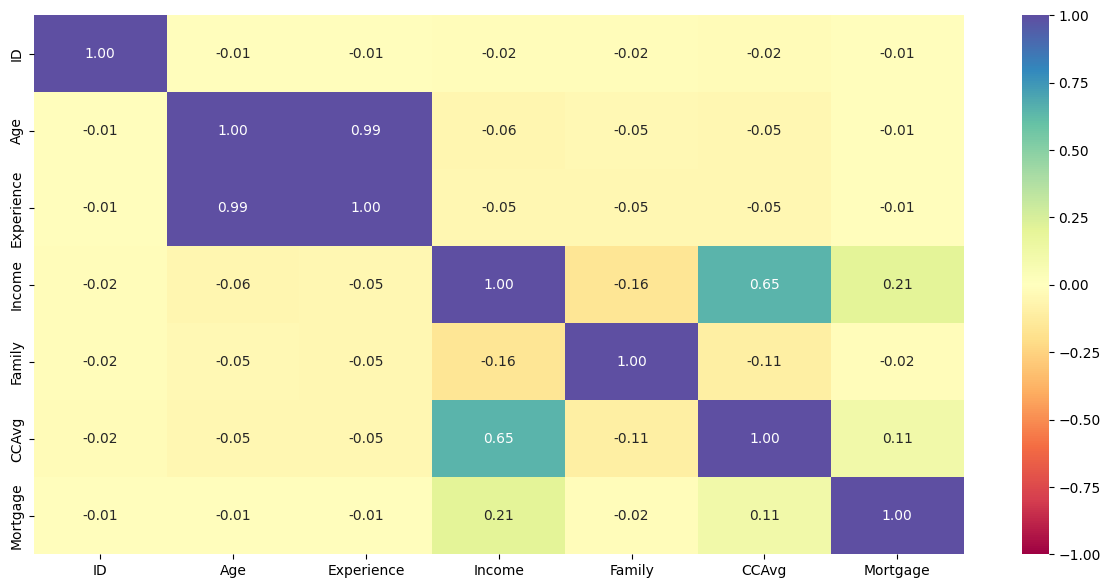

In [48]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")  #Get the heatmap for the dataset/numerical columns
plt.show()

**Observations**


*   There is a high positive correlation between Age and Experience. Correlation of 99% is observed.
*   As Age increases, Experience seems to increase. However Age seems to have a negative correlation with Income, CCAvg and Mortgage.
*   Experience seems to have a negative correlation with with Income, CCAvg and Mortgage.
*  Income seems to have a positive correlation with CCAvg and Mortgage. This implies that customers who have high income also have higher spending on Credit card and have high mortgages as well.
*   Income seems have to a negative correlation with Family count.
*   Younger customers seems have to have less family count since there is a
negative correlation with Age & Family








#### Let's check how a customer's interest in purchasing a loan varies with their education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


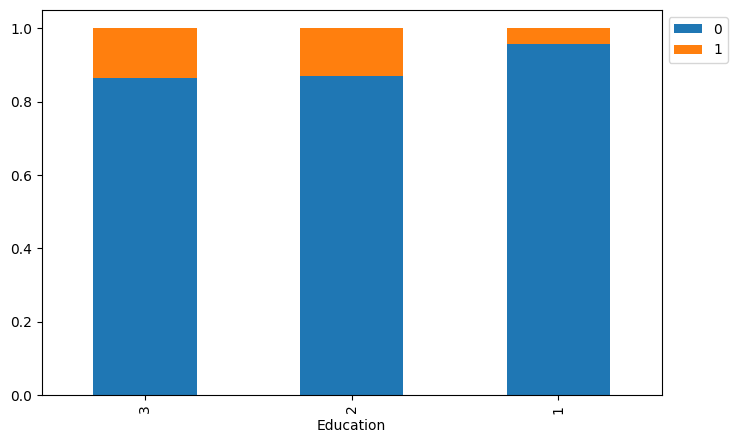

In [37]:
stacked_barplot(df, "Education", "Personal_Loan")

#### Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


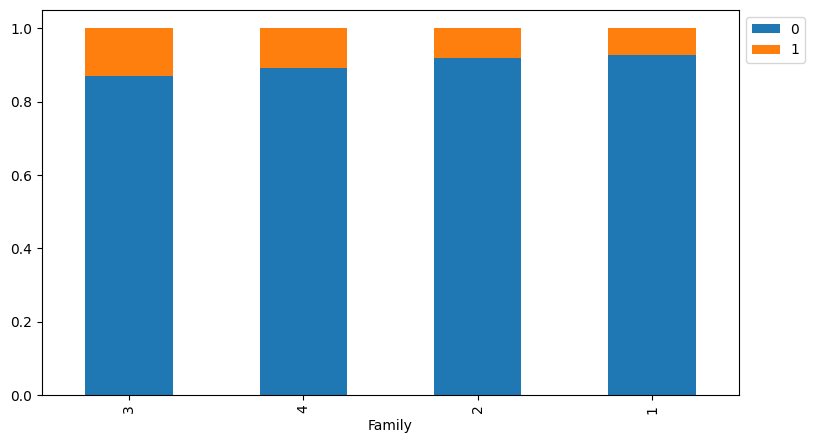

In [131]:
stacked_barplot(df, "Family", "Personal_Loan")

#### Family Vs Securities_Account and Personal_Loan vs Security Deposit

Securities_Account     0    1   All
Family                             
All                 4478  522  5000
1                   1330  142  1472
4                   1083  139  1222
2                   1161  135  1296
3                    904  106  1010
------------------------------------------------------------------------------------------------------------------------


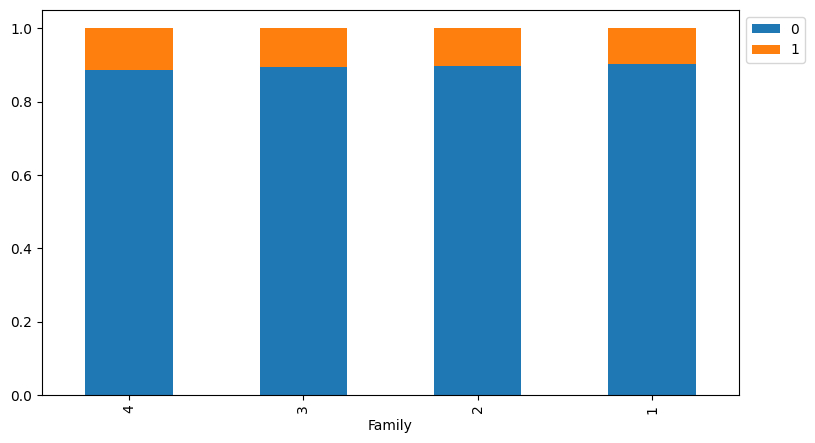

In [38]:
stacked_barplot(df, "Family", "Securities_Account")

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


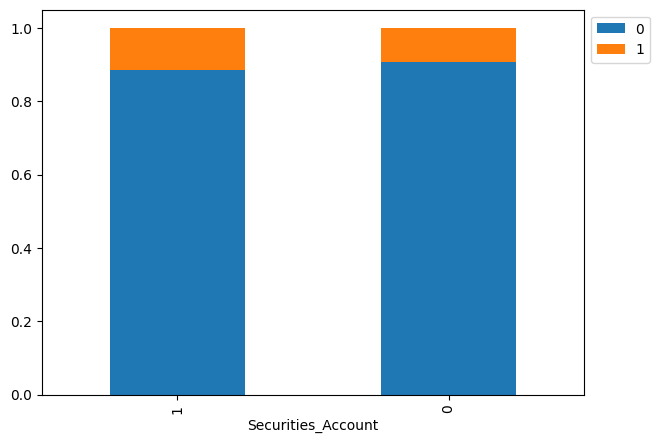

In [132]:
stacked_barplot(df, "Securities_Account", "Personal_Loan")

CD_Account     0    1   All
Family                     
All         4698  302  5000
1           1389   83  1472
3            928   82  1010
4           1152   70  1222
2           1229   67  1296
------------------------------------------------------------------------------------------------------------------------


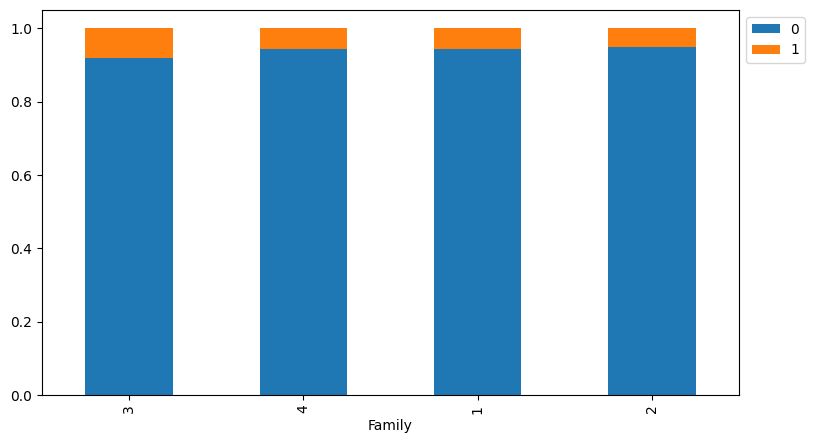

In [39]:
stacked_barplot(df, "Family", "CD_Account")

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


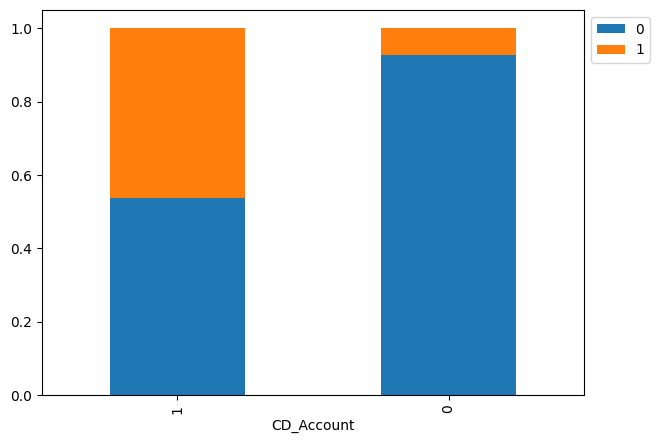

In [133]:
stacked_barplot(df, "CD_Account", "Personal_Loan")

#### Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


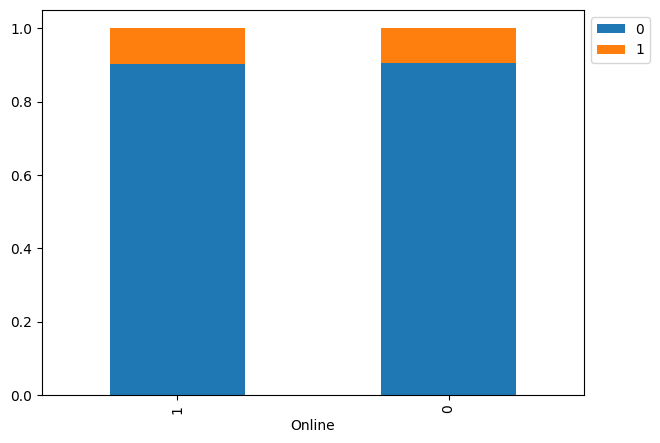

In [134]:
stacked_barplot(df, "Online", "Personal_Loan")

#### Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


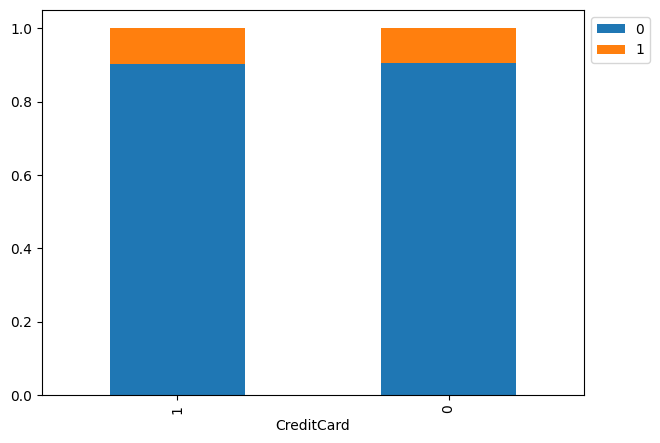

In [135]:
stacked_barplot(df, "CreditCard", "Personal_Loan")

#### Personal_Loan vs ZipCode

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


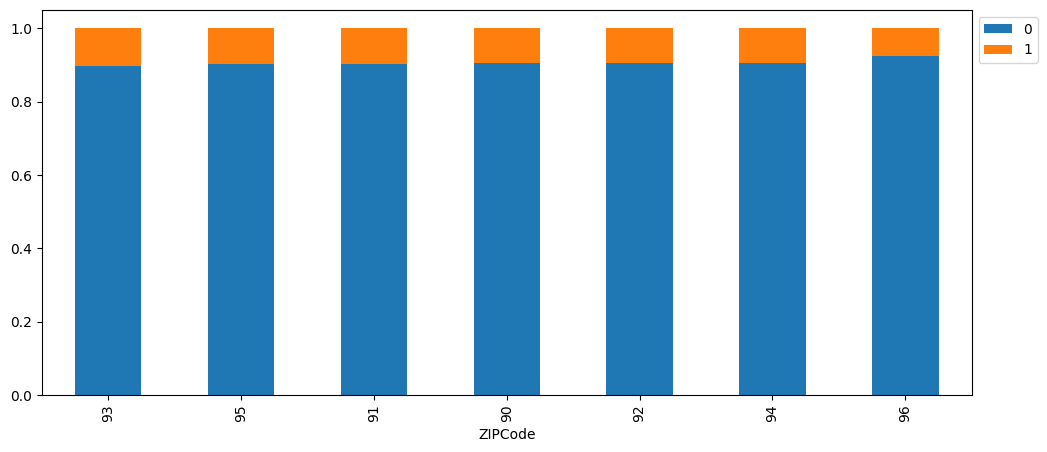

In [136]:
stacked_barplot(df, "ZIPCode", "Personal_Loan")

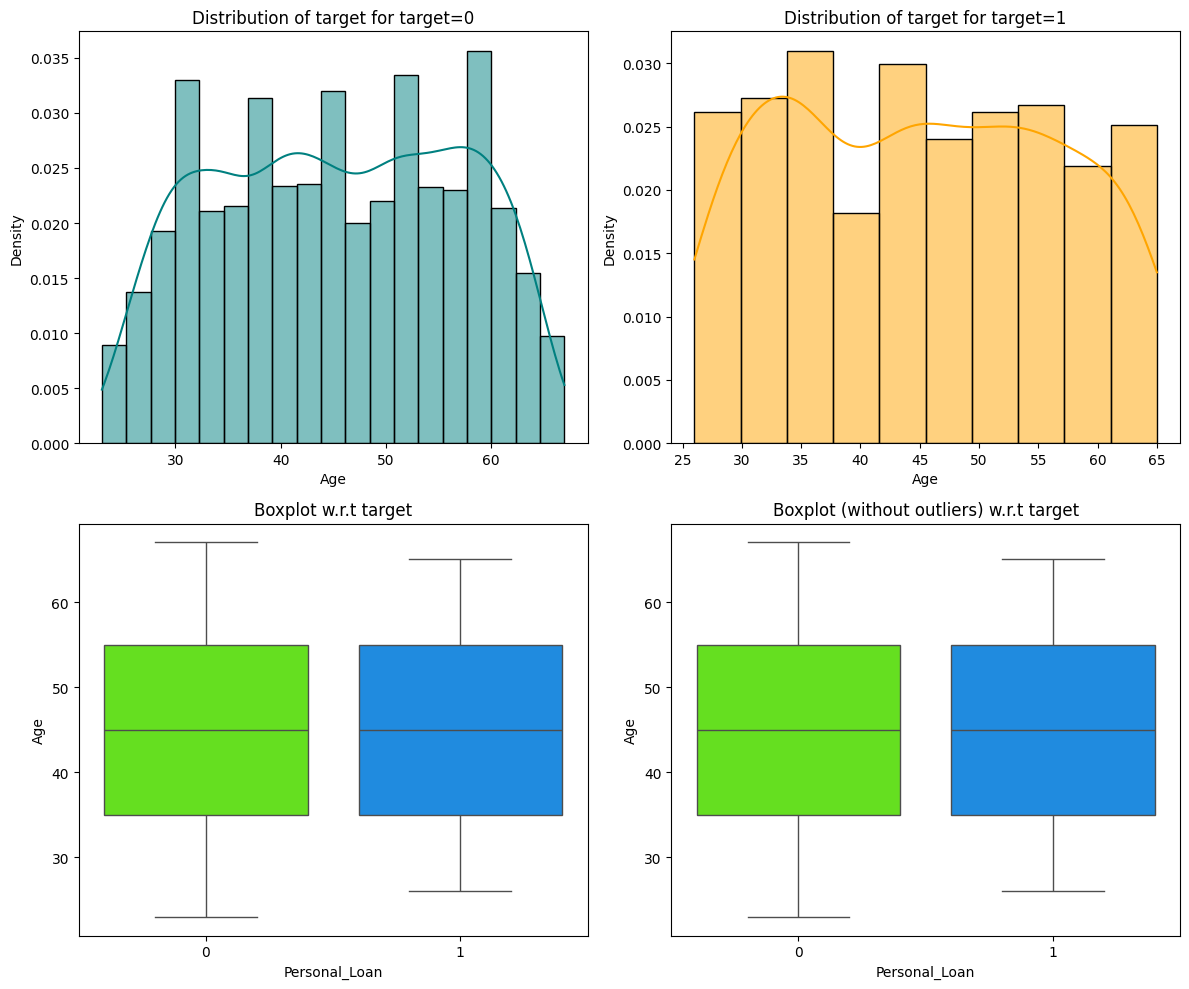

In [137]:
#### Let's check how a customer's interest in purchasing a loan varies with their age
distribution_plot_wrt_target(df, "Age", "Personal_Loan")

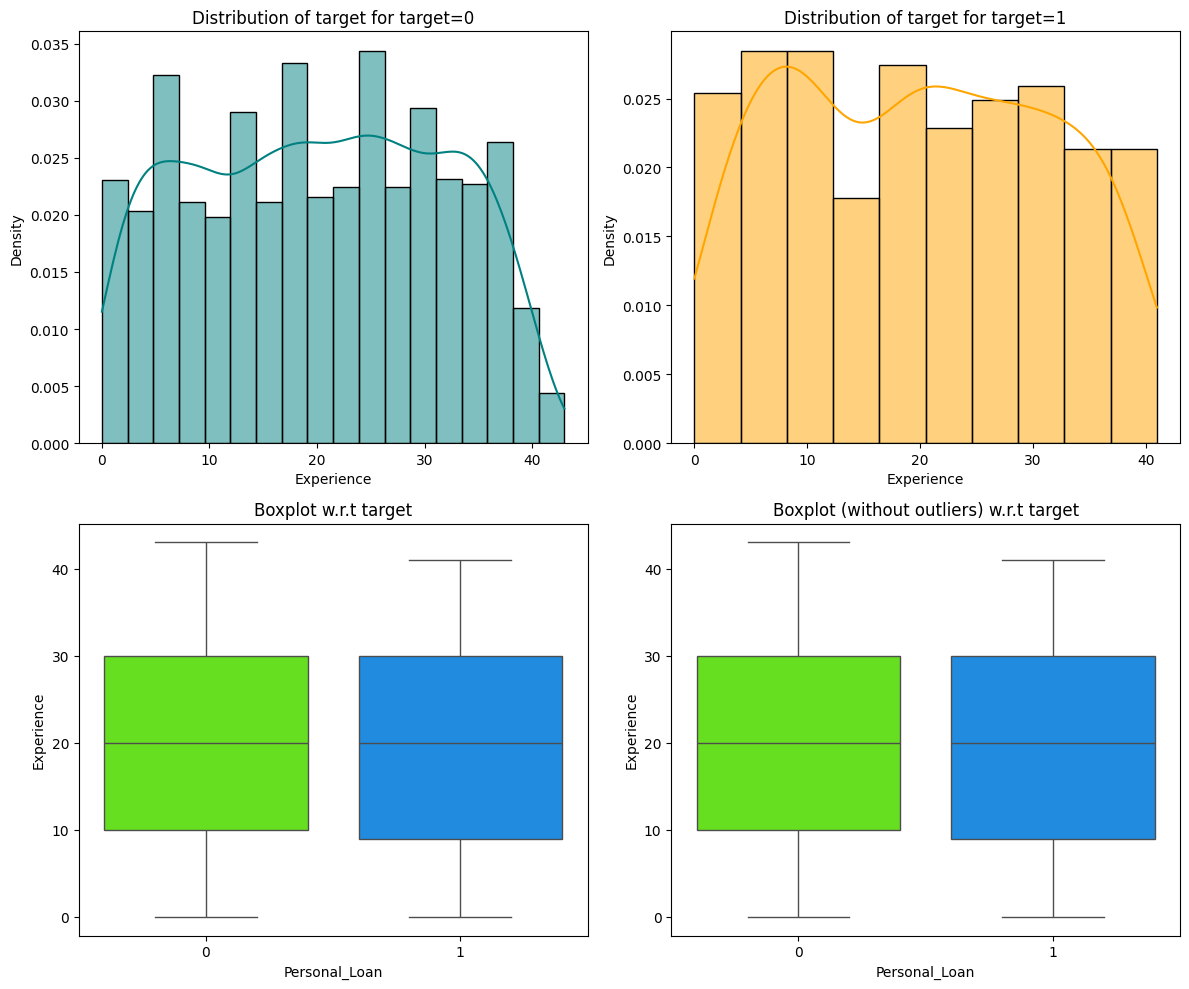

In [138]:
#### Personal Loan vs Experience
distribution_plot_wrt_target(df, "Experience", "Personal_Loan")

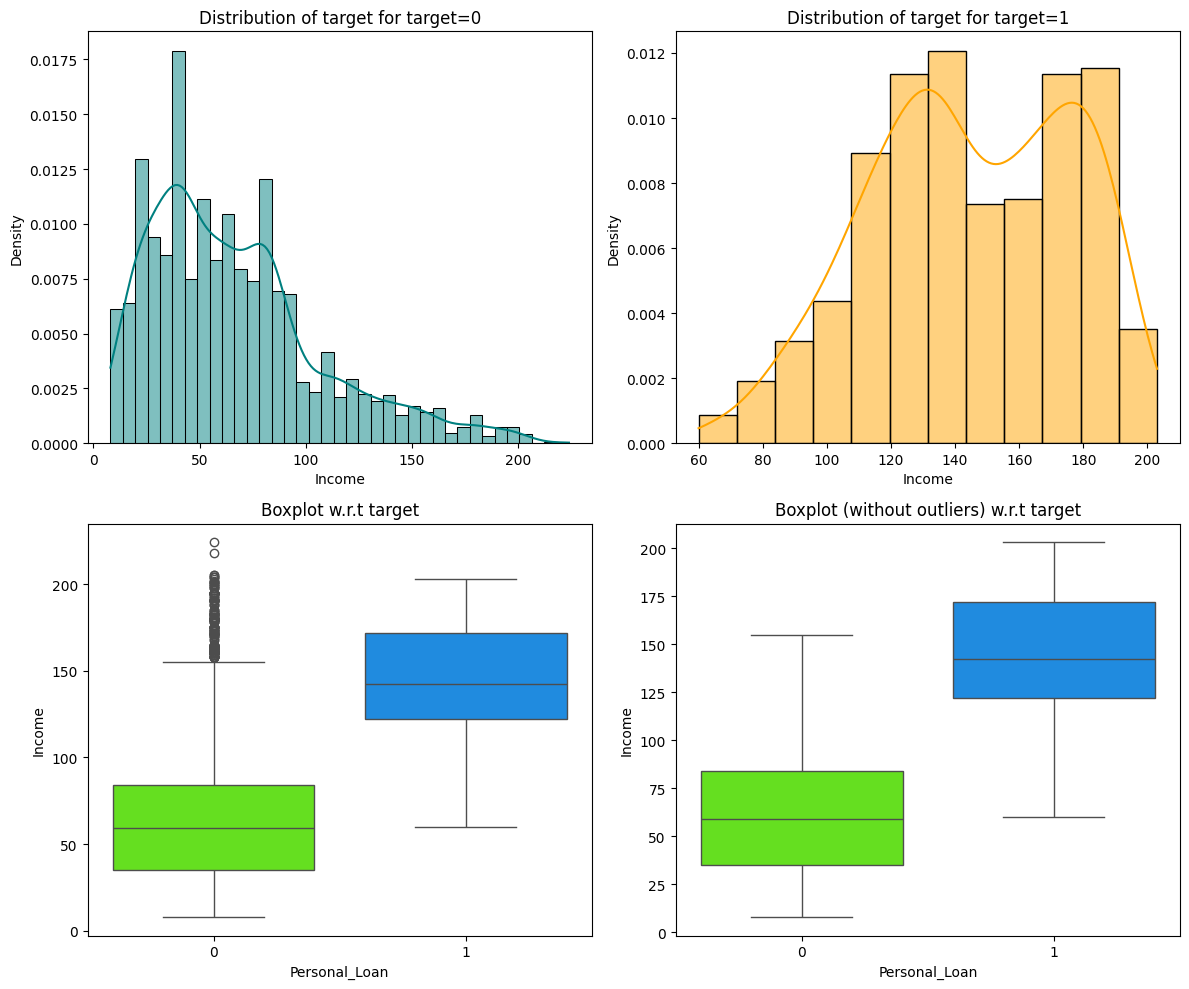

In [139]:
#### Personal Loan vs Income
distribution_plot_wrt_target(df, "Income", "Personal_Loan")

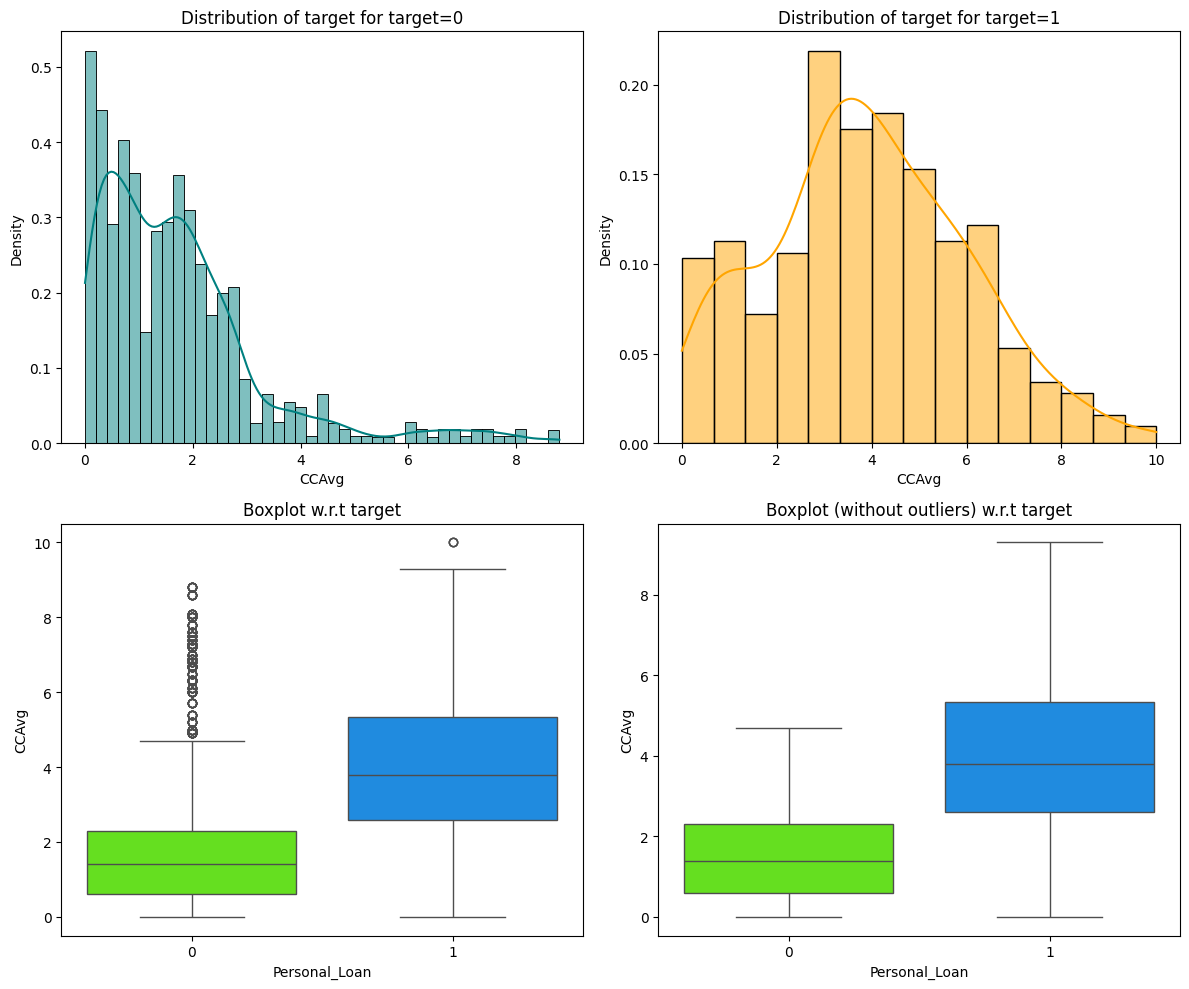

In [140]:
#### Personal Loan vs CCAvg
distribution_plot_wrt_target(df, "CCAvg", "Personal_Loan")

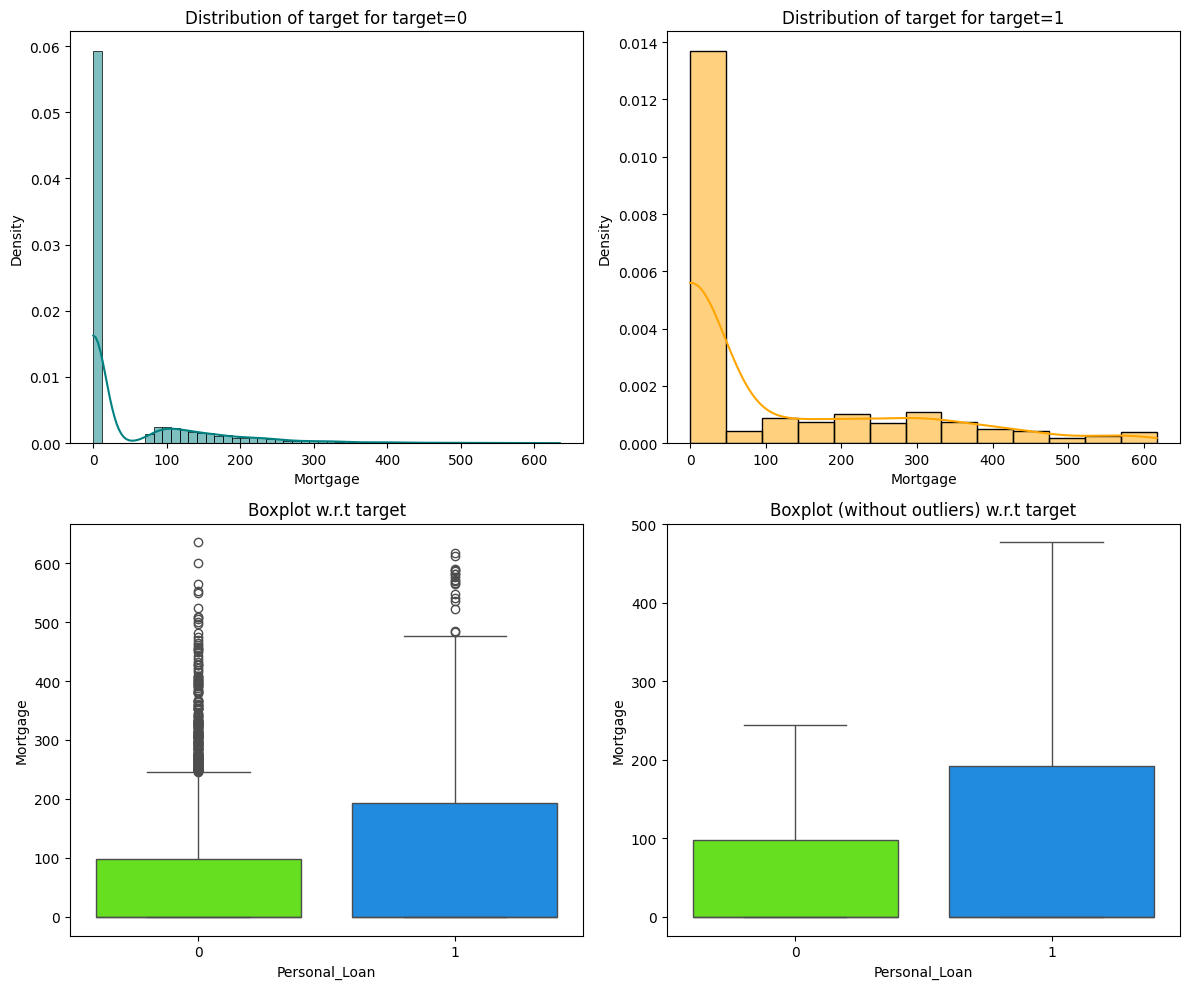

In [141]:
#### Personal Loan vs Mortgage
distribution_plot_wrt_target(df, "Mortgage", "Personal_Loan")

**Observation -Bivariate Analysis**



*   Customers with higher education level of 3 have applied for loan more when compared to undergrad customers.But majority of the customers have not applied for loan.
*   Customers having family count of 4 and 3 have applied for loan more when compared for customers with family count of 2,and 1. But majority of the customers have not applied for loan.

*   Majority of the customers who does  not have a security account&CD account with the bank  have applied for loan more when compared to those having security account/CD account within bank.There are about 462 customers who have security account with Bank but only 60 of them have applied for loan.There are about 162 customers with CD_Account with the bank and almost all of them nearly ~140 applied for loan.


*   Customers having a family count of 1 seems to have more security_account and CD_account with the bank.


*   Customers having online banking have applied for loan more than customers without online banking.

*   Customers who does not have credit card with other banks have applied for loan more when compared to customers having credit card with other banks.
*   Customers belonging to region ZipCode 94, 92, 95 have applied for loan more when compared to other regions. Least being region Zipcode.

* Customers between Age 35 ~55 have applied for loan the most . Most of the customers have applied for loan seems to have an experience between 10 and 30 yrs.
*  Those having exceptionally high income have not applied for loans but those customers who have applied for loan have income ranging between 120K ~ 180K.Customers with good income have applied for loan.


*   Those having higher mortgages have applied for loan the most.

* Those having exceptionally high CCAvg have not applied for loans but those customers who have applied for loan have CCVg ranging between 3K ~ 7K













## Data  Preparation




*   There 5000 unique IDs of the customers. We could drop this column before model building as it might be insignificant.
*   Age and Experience seeems to be highly positively correlated(99% of correlation). Therefore we could drop the Experience column as Age would be sufficient.
*   Outliers were seen in Income, CCAvg and Mortgage fields. These could be treated






### Outlier Detection

We have seen outliers in CCAvg, Income and Mortgage fields as well. We could treat them with two possibilities-


*  All the values smaller than Lower_Whisker will be assigned value of Lower_whisker
*  All the values above upper_whisker will be assigned value of upper_Whisker

                                                         


In [40]:
#Lets calculate upper bound and lower bound for Income
Q1=df['Income'].quantile(0.25) # 25th quantile
Q3=df['Income'].quantile(0.75)  # 75th quantile
IQR=Q3-Q1
Lower_Whisker_Income = Q1 - 1.5*IQR
Upper_Whisker_Income = Q3 + 1.5*IQR


In [41]:
df[df['Income'] > Upper_Whisker_Income].count()


ID                    96
Age                   96
Experience            96
Income                96
ZIPCode               96
Family                96
CCAvg                 96
Education             96
Mortgage              96
Personal_Loan         96
Securities_Account    96
CD_Account            96
Online                96
CreditCard            96
dtype: int64

In [42]:
#Lets calculate upper bound and lower bound for Mortgage
Q1=df['Mortgage'].quantile(0.25) # 25th quantile
Q3=df['Mortgage'].quantile(0.75)  # 75th quantile
IQR=Q3-Q1
Lower_Whisker_Mortgage = Q1 - 1.5*IQR
Upper_Whisker_Mortgage = Q3 + 1.5*IQR

In [43]:
df[df['Mortgage'] > Upper_Whisker_Mortgage].count()

ID                    291
Age                   291
Experience            291
Income                291
ZIPCode               291
Family                291
CCAvg                 291
Education             291
Mortgage              291
Personal_Loan         291
Securities_Account    291
CD_Account            291
Online                291
CreditCard            291
dtype: int64

In [44]:
#Lets calculate upper bound and lower bound for CCAvg
Q1=df['CCAvg'].quantile(0.25) # 25th quantile
Q3=df['CCAvg'].quantile(0.75)  # 75th quantile
IQR=Q3-Q1
Lower_Whisker_CCAvg = Q1 - 1.5*IQR
Upper_Whisker_CCAvg = Q3 + 1.5*IQR

In [45]:
df[df['CCAvg'] > Upper_Whisker_CCAvg].count()

ID                    324
Age                   324
Experience            324
Income                324
ZIPCode               324
Family                324
CCAvg                 324
Education             324
Mortgage              324
Personal_Loan         324
Securities_Account    324
CD_Account            324
Online                324
CreditCard            324
dtype: int64

**Observation**



*   There are about 96 records exceeding upper bound on Income
*   There are about 291 records exceeding upper bound on Mortgage
*   There are about 324 records exceeding upper bound on CCAvg
*   Trimming records would result in significant data loss, therefore all records exceeding max upperbound can be replaced by upper bound.




In [46]:
df_copy_before_outlier= df.copy() #Taking additional copy of data before outlier treatment

In [47]:
df['Income'] = np.clip(df['Income'], None, Upper_Whisker_Income)#Replace values higher than upper bound with upper bound

In [48]:
df['Mortgage'] = np.clip(df['Mortgage'], None, Upper_Whisker_Mortgage)#Replace values higher than upper bound with upper bound

In [49]:
df['CCAvg'] = np.clip(df['CCAvg'], None, Upper_Whisker_CCAvg)#Replace values higher than upper bound with upper bound

In [50]:
df.describe().T #As seen below, outliers have been treated for the columns Income, CCAvg and Mortgage. The max values have been treated with the upper bound values

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.617400,45.626122,8.0,39.00,64.0,98.00,186.5
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.831338,1.452215,0.0,0.70,1.5,2.50,5.2
Mortgage,5000.0,50.494700,83.005401,0.0,0.00,0.0,101.00,252.5


In [51]:
X= df.drop(["Personal_Loan","ID",'Experience'],axis=1) #Lets drop ID as its unique, Experience column as it correlates to Age .
Y=df["Personal_Loan"] #Personal is the dependent variable that we would like to evaluate

X=pd.get_dummies(X,columns=["ZIPCode", "Education"],drop_first=True)


#splitting data
X_train, X_test, y_train, y_test =train_test_split(
    X, Y, test_size=0.30, random_state=1  #We will use 30% for test and the rest 70 % of data for training model
)

In [52]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


**Observation**

As we can see the training set has 90% of class 0 and 10% of class 1. This was the actual data too since most of the customers did not opt for loans.

## Model Evaluation Criteria



*   Model created can predict the customers who can purchase a loan from the bank.

**Risks associated with model prediction**
*   Predicting a customer would purchase a loan but in reality the customer may not purchase the load - Model predicting a False positive


*   Predicting a customer would not purchase a loan but in reality the customer might be willing to accept the loan - Model predicting False Negatives. This could be a potential loss for the bank when customers are lost. This seems to be a better criteria for evaluating the model.

Therefore minimizing False Negative or in other words increasing Recall  will be a good criteria to evaluate models.








## Model Building

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot confusion matrix.

In [53]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [54]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

##**Model 1 - Basic decision tree with defaults (Gini impurity)**

In [55]:
dTree = DecisionTreeClassifier(criterion='gini',random_state=1)
dTree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [56]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.986


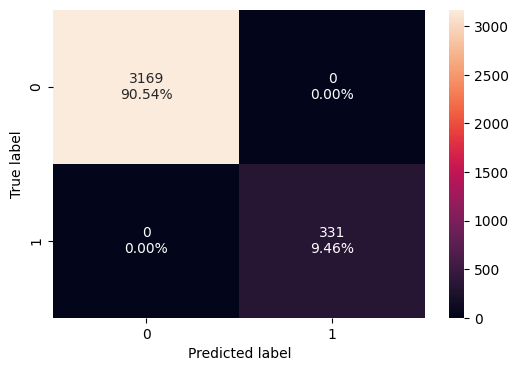

In [57]:
confusion_matrix_sklearn(dTree, X_train, y_train) #Confusion matrix on training

In [58]:
decision_tree_perf_train = model_performance_classification_sklearn(
    dTree, X_train, y_train
)
decision_tree_perf_train     # Scores Accuracy, Recall , Precision , F1 on training

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


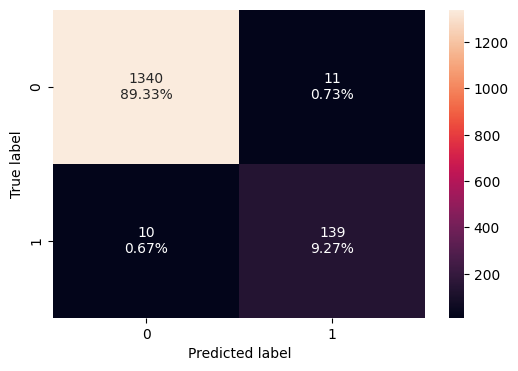

In [59]:
confusion_matrix_sklearn(dTree, X_test, y_test)#Confusion matrix on test

In [60]:
decision_tree_perf_test = model_performance_classification_sklearn(
    dTree, X_test, y_test
)
decision_tree_perf_test# Scores Accuracy, Recall , Precision , F1 on test

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


In [61]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


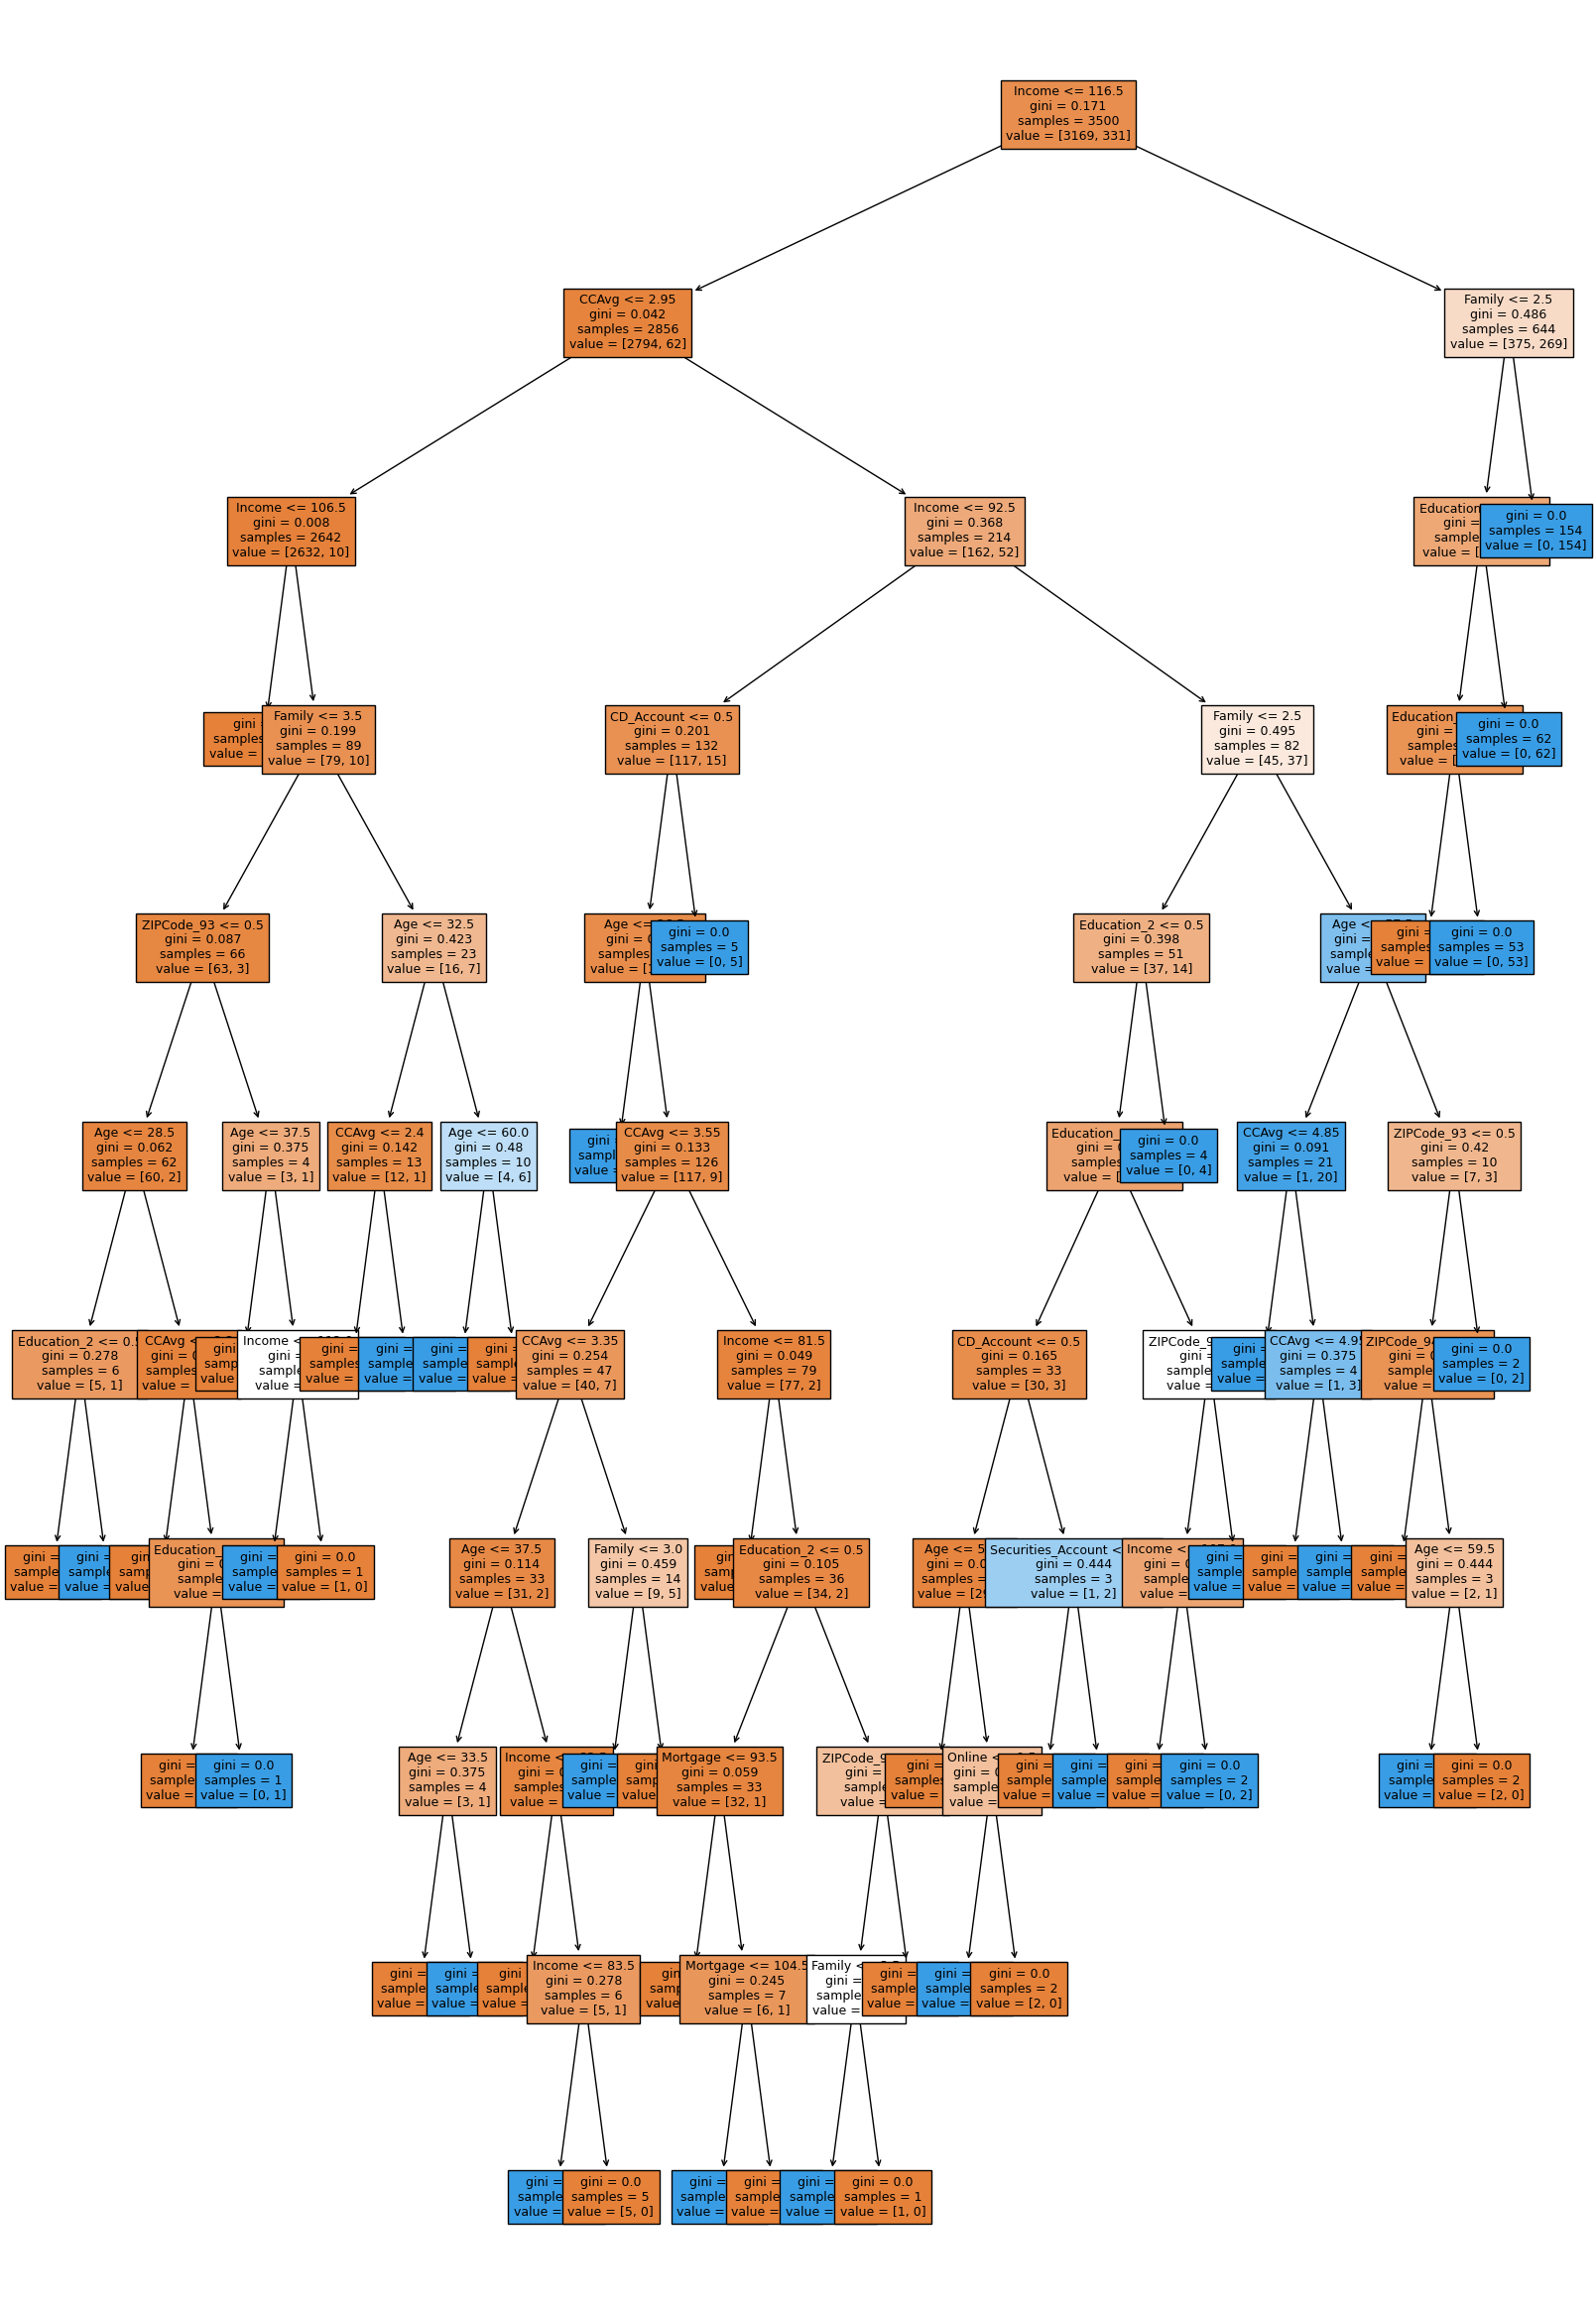

In [62]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [82]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [230.28, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |--- weights: [1.42, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- Income <= 67.00
|   |   |   |   |   |   |   |   |--- weights: [0.76, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  67.00
|   |   |   |   |   |   |   |   |--- ZIPCode_95 <= 0.50
|   |   |   |   |   |   |   |   |   |--- Income <= 84.00
|   |   |   |   |   |   |   |   |   |   |--- Securities_Account_1 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- Securities_Account_1 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.09, 0.00] class: 0
|   |   |   |   

In [63]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.308098
Family              0.259255
Education_2         0.166192
Education_3         0.147127
CCAvg               0.048798
Age                 0.033150
CD_Account          0.017273
ZIPCode_94          0.007183
ZIPCode_93          0.004682
Mortgage            0.003236
Online              0.002224
Securities_Account  0.002224
ZIPCode_91          0.000556
ZIPCode_92          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
CreditCard          0.000000


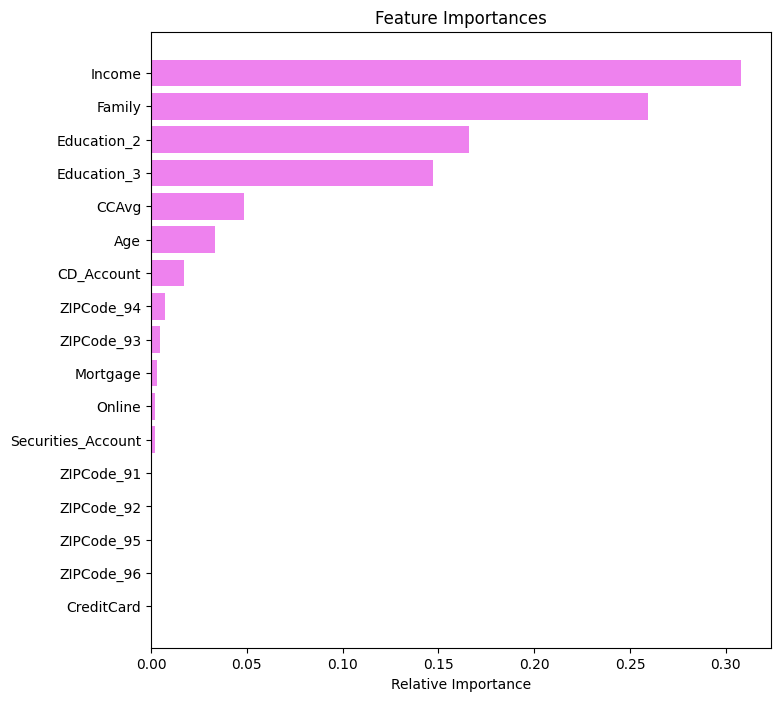

In [64]:
#Lets print the graphical representation of features with their importance
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

Training set observations:

*   Though the acuuracy seems to be comparable between training(100%) and test data set(98%), we should think of what can be a better score for testing.Bank wants to retain the liability customers and asset customers and identify potentital borroweres from the liability customers(depositers). Modeling identifying True positivies is great but model predicting False Negatives could be a great loss for the bank as they might be loosing potential customers who are willing to apply for loan.

*  Therefore, Recall could be a better score to look when comparing model score.
*  The accuracy, Recall and Precision and F1 score is 1 on training set .100 % on recall or score of 1 indicates the model has low chances of predicating a true positive or false negative. As per the model, it predicts a zero FN and zero FP on training set which is highly unlikely. This appears to be highly overfitting model.

Testing set observations:


*   Model seems to be predicting FP and FN as well with test data . In this specific case, bank cannot afford to loose on the FN ( these are actually potential bank borrowers)

*   Accuracy is 98%, Recall is 93%  and Precision is 92.6 % with a F1 score of 92.3%. Comparing  models on test /training set,there is a large variation in scores. Recall score has reduced from 100% to 93%  but the  model could be still overfitting.


*   The decision tree seems to be very complex . Income,Family,Education 2,Education 3, and CCAvg seems to be the most important features considered by the model.

Let's evaluate other models by tuning.





















### Model Performance Improvement

##**Model 2 - Pre-Pruning**

In [65]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(3, 16),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)  #Lets use recall as it seems to be better in our scenario

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=10,
                       random_state=1)

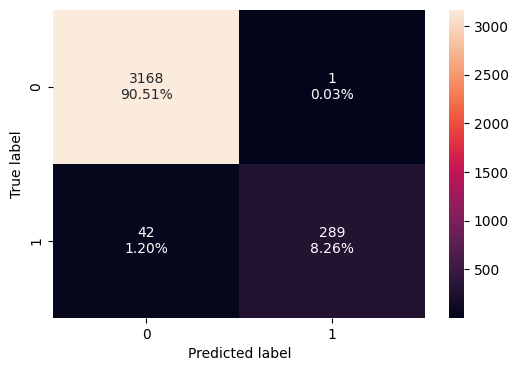

In [66]:
confusion_matrix_sklearn(estimator, X_train, y_train) #Confusin matrix on training data

In [67]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train) #Scores on training data
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.987714,0.873112,0.996552,0.930757


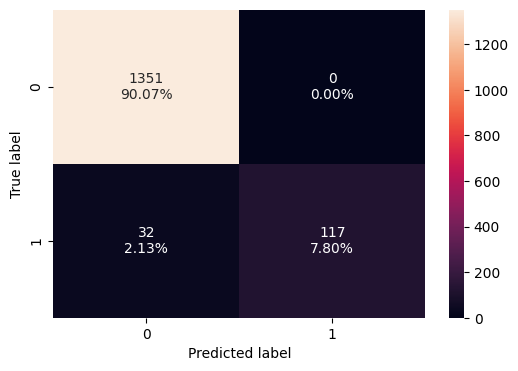

In [68]:
confusion_matrix_sklearn(estimator, X_test, y_test) #confusion matrix on test data

In [69]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test) #Scores on test data
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.978667,0.785235,1.0,0.879699


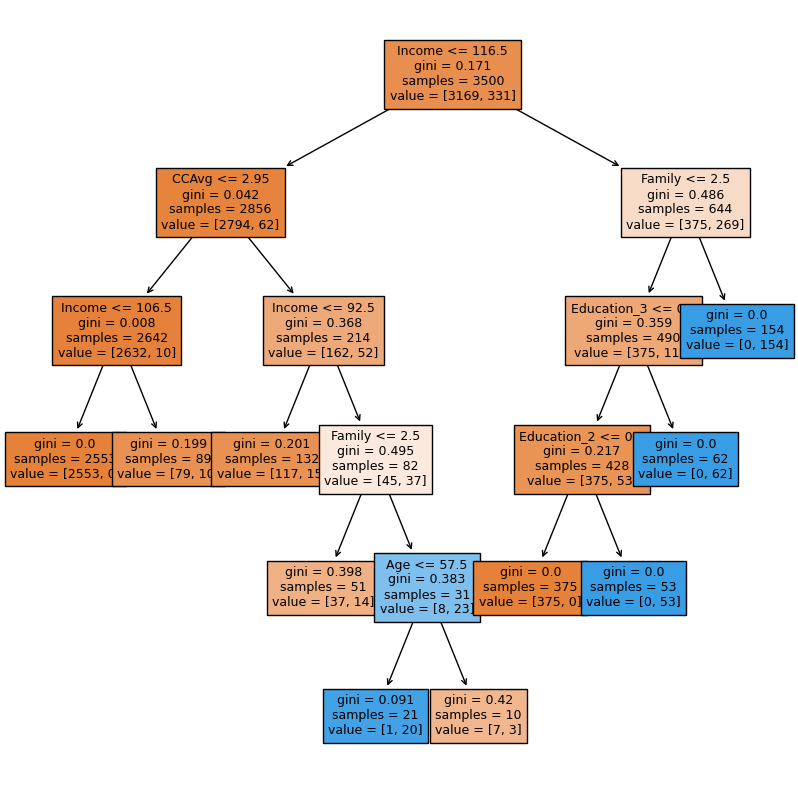

In [70]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [71]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- weights: [37.00, 14.00] class: 0
|   |   |   |--- Family >  2.50
|   |   |   |   |--- Age <= 57.50
|   |   |   |   |   |--- weights: [1.00, 20.00] class: 1
|   |   |   |   |--- Age >  57.50
|   |   |   |   |   |--- weights: [7.00, 3.00] class: 0
|--- Income >  116.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [0.00, 53.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [0.00, 62.00] class: 1
|   |--- Family >  2.

In [72]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.337681
Family              0.275581
Education_2         0.175687
Education_3         0.157286
CCAvg               0.042856
Age                 0.010908
CD_Account          0.000000
Online              0.000000
Securities_Account  0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_93          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
Mortgage            0.000000
CreditCard          0.000000


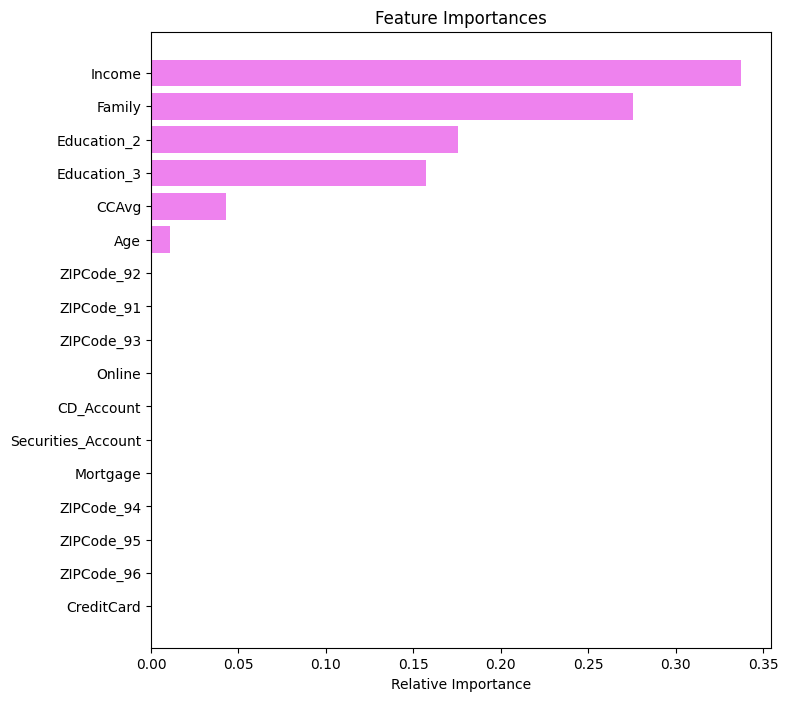

In [73]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**



*   GriDSeearchCV calculated  the optimum parameters for decision tree as - max_depth as 6, max_leaf nodes as 10 , min sample leaf as 10

Training data observation:
*   Accuracy is 98.7% with Recall as 87% & Precision as 99%. F1 score is 93% as well on the training data.

Test data observations:


*  Accuracy is 97.8% with Recall as 78% & Precision as 100%. F1 score is 87.9% as well on the test data.
*   Recall seems to be reduced when compared to the training model which means its not an overfitting model and will be able to predict well. REcall score seems to be good for this model


*   Depth of the tree has been reduced and is now 6.Not a very complex tree.
*   This model has considered the most important features as Income, Family, education2 ,education3 and CCavg and age.











**Cost Complexity Pruning**

Another option to prune a tree is using a parameter called  ccp_alpha.Greater the values of ccp_alpha, increase the number of nodes pruned and greater the impurities as well. Let's find the best alpha and create a classifer based on the best ccp_alpha to create a model

In [74]:
clf = DecisionTreeClassifier(random_state=1) #Create a classifier
path = clf.cost_complexity_pruning_path(X_train, y_train) # find the cost complexity path using training data
ccp_alphas, impurities = path.ccp_alphas, path.impurities # find all alphas and impurities at each step/node

In [75]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000214,0.001542
3,0.000242,0.002750
4,0.000250,0.003250
5,0.000268,0.004324
6,0.000272,0.004868
7,0.000276,0.005420
8,0.000381,0.005801
9,0.000527,0.006329


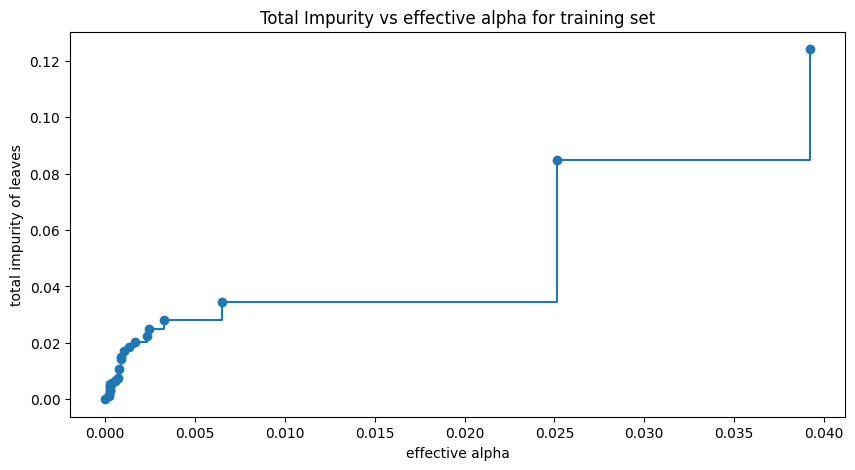

In [76]:
#Graph shows Impurity Vs Alpha. As alpha increases, impurity also increases
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

**Observation**



*   The graph shows that there is a sudden increase in impurity after
 0.004 ~ 0.005




In [77]:
# We are training the decision tree with effective alphas.The last value in the alpha is the one which prunes the whole tree.
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)    #Fit tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


**Observation**


*   We will remove the last element in clfs and ccp_alphas as it shows the smallest node.




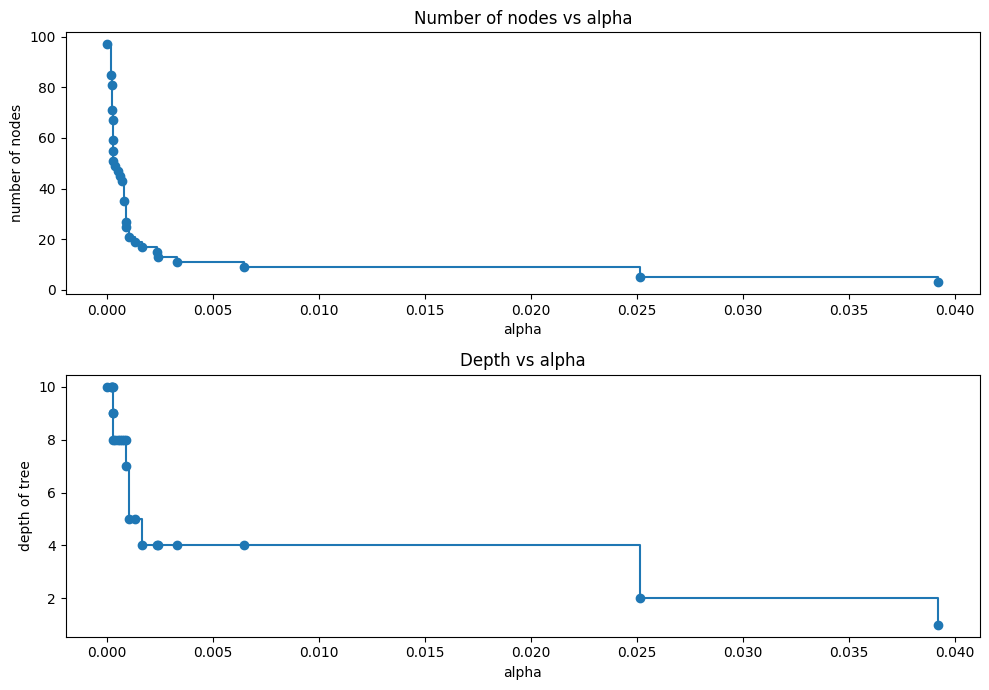

In [78]:
clfs = clfs[:-1] # Remove the last one and consider only the rest for evaluation
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Observation**



*   It is observed that at about 0.003 ~ 0.005 , the number of nodes & depth of the tree is too small that it may seem to underfit the data.

*   Therefore from the graphs it is clear that an alpha value below 0.003 may be the optimum value



**Recall Vs CCP_Alpha**
Lets calculate recall value on training and testing data for every alpha

In [79]:
#Lets calculate recall value on training and testing data for every alpha

recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

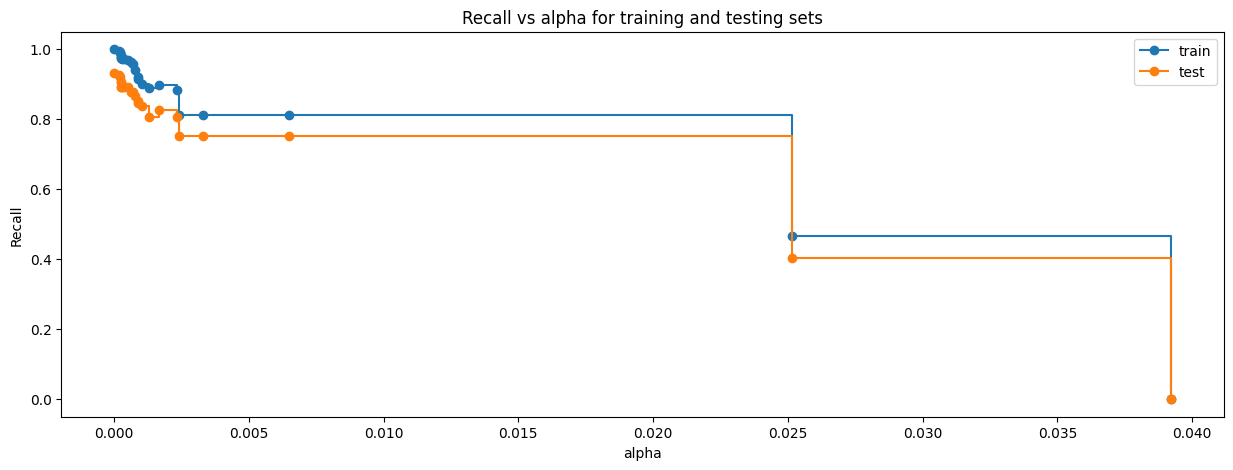

In [80]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [81]:
# creating the model where we get highest train recall
index_best_model_train = np.argmax(recall_train)
best_model_train = clfs[index_best_model_train]
print(best_model_train)

DecisionTreeClassifier(random_state=1)


In [82]:
#Optimum ccp alpha based on Recall
# creating the model where we get highest  test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


**Observation**



*  Recall gives the best predicatability model at ccp_alpha 0 . This may seem to create an overfitting model




**Accuracy Vs CCP Alpha**



Calculate accuracy for every alpha on training & test data set and determine best alpha

In [83]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

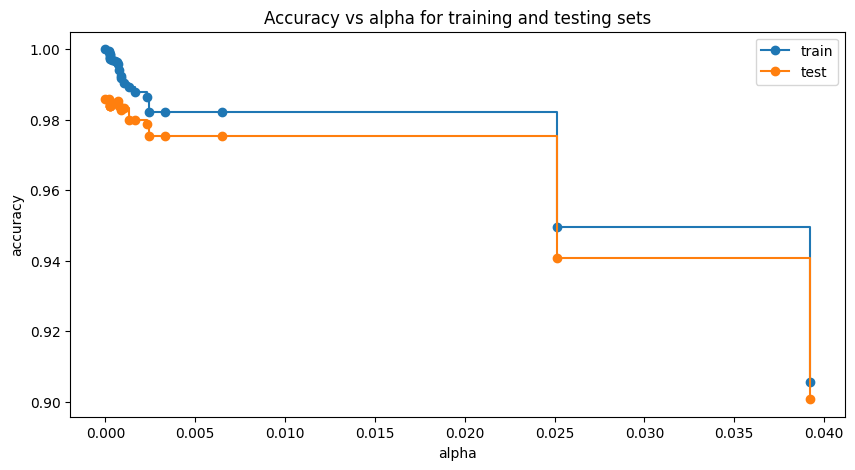

In [84]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [85]:
#Optimum ccp alpha based on Accuracy
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(random_state=1)
Training accuracy of best model:  1.0
Test accuracy of best model:  0.986


**Observations**


 Most optimum alpha for the best model is alpha **0.0** for both training and test data sets based on recall

 Most optimum alpha for the best model is alpha **0.000214** for both training and test data sets based on accuracy













##**Model 3 -Post-Purning**

Build the decision tree using the best alpha which 0.0 based on the recall test

In [89]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=0, class_weight={0: 0.15, 1: 0.85}, random_state=1      # Let's choose ccp_alpha as 0 as that is optimum alpha based on best model
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

In [90]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2, X_train, y_train)
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


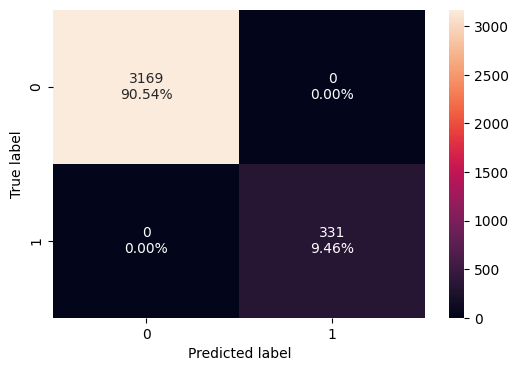

In [91]:
confusion_matrix_sklearn(estimator_2, X_train, y_train)

In [92]:
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2, X_test, y_test)
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.979333,0.852349,0.933824,0.891228


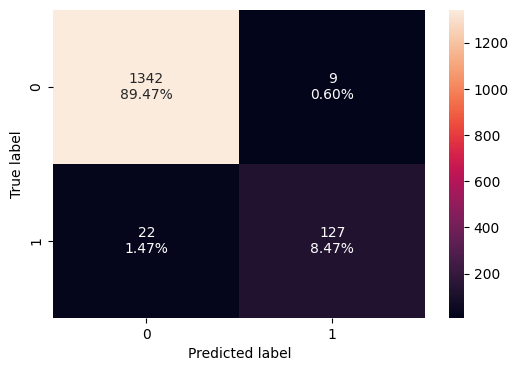

In [93]:
confusion_matrix_sklearn(estimator_2, X_test, y_test)

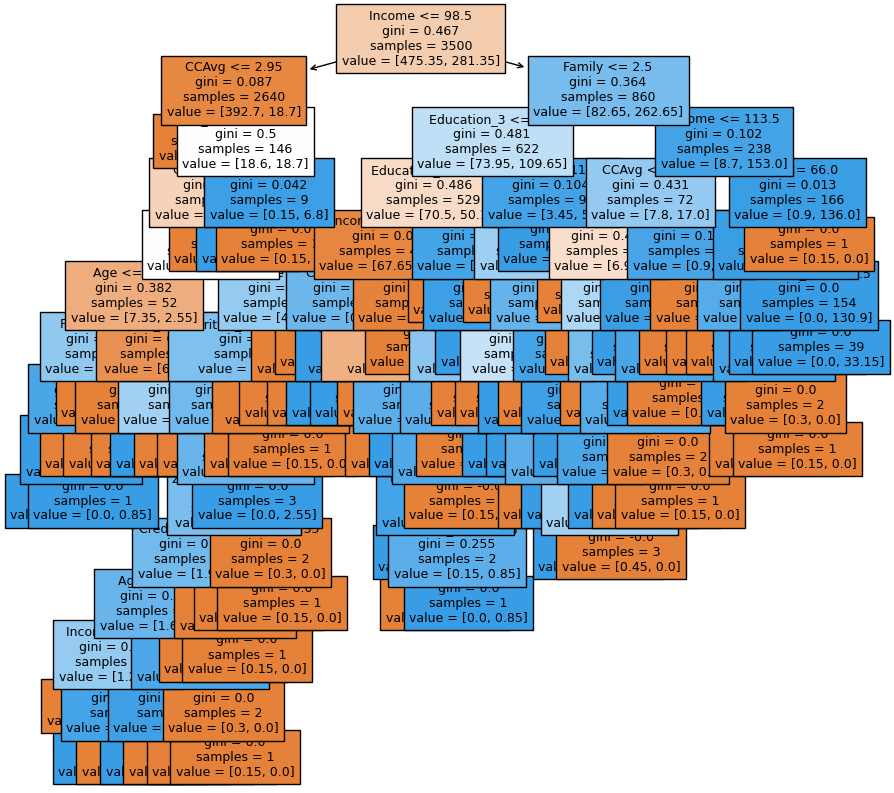

In [94]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [95]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- Income <= 75.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- Income >  75.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |   |   |--- Age <= 37.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 

In [96]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.597264
Education_2         0.138351
CCAvg               0.078877
Education_3         0.067293
Family              0.066244
Age                 0.018973
CD_Account          0.011000
Mortgage            0.005762
Securities_Account  0.004716
ZIPCode_94          0.004702
ZIPCode_91          0.003587
CreditCard          0.002428
ZIPCode_92          0.000802
Online              0.000000
ZIPCode_93          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000


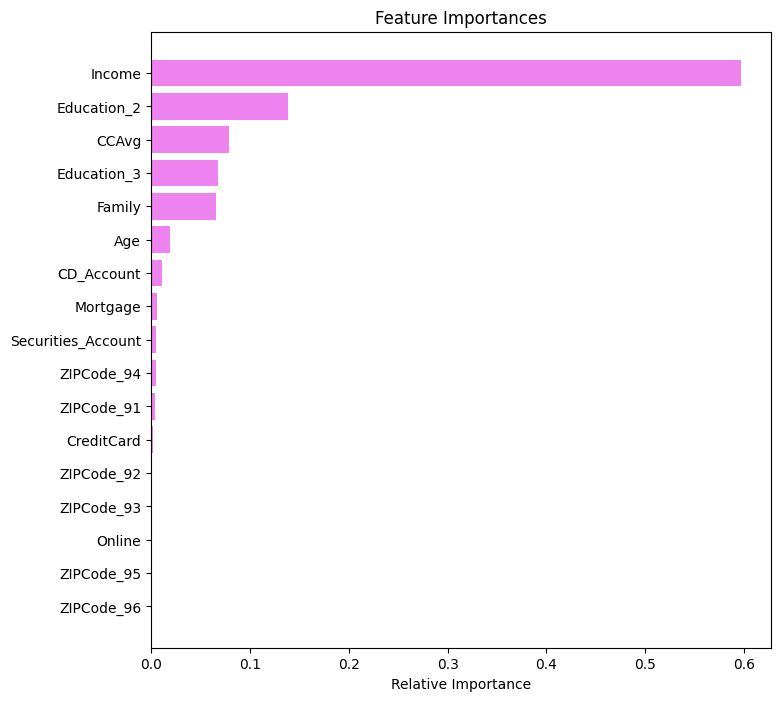

In [97]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation**

Training data observations:

*   Model predicats 100 % accuracy and 100% recall . Confusion matrix on training data shows zero FP and zero FN. Seems to be overfitting model.

Test data observations:

*   The accuracy is 97% with recall of 85.9% and precision of 93.3%. F1 score is 89.1%.Model seems to be predict FP and FN on test data.
*   The tree seems to be very complex and overfitting.

*   The most important features considered by the model are Income, Education2, CCAvg, Education3,Family and Age.








## Model Comparison and Final Model Selection

In [98]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T,decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.987714,1.0
Recall,1.0,0.873112,1.0
Precision,1.0,0.996552,1.0
F1,1.0,0.930757,1.0


In [99]:
# test performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T,decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.986000,0.978667,0.979333
Recall,0.932886,0.785235,0.852349
Precision,0.926667,1.000000,0.933824
F1,0.929766,0.879699,0.891228


**Conclusion on best model**



*   The Accuracy, Recall, Precision scores on training data for Decision Tree Sklearn and Decision Tree Post Pruned is all at 100%. This raises question on an overfitting model even though the model performance on test data  seems to be good.

*   The Accuracy , Recall, Precision scores on training data and test data for Decision Tree Pre Pruning model is comparable.The recall score of 87% on training data and 78% on test data is comparable and explains that model does not seem to be overfitting.

*   Decision Tree Pre Pruning model had a less complex tree of depth 6 when compared to both the other models which were very complex.

Based on recall and performance of the model on test/training data, we can conclude that Decision Tree Pre-Pruning is the best model.



## Actionable Insights and Business Recommendations


**Insights**

The key features considered by the best  model are Income, Family, Education, CCAVg and Age.

Based on the key features considered by model and also on EDA -


*   Higher the income, more chances that the customer is willing to accept Personal loan.
*   Higher the education, higher the income and more chances that the customer is willing to accept Personal loan.

*   Higher the CCAvg (spending of customers), more chances that the customer is willing to accept Personal loan.
*   As the family grows, more chances that the customer is willing to accept Personal loan.

*  Out of the total customers who have CD_Account with the bank about majority have personal loans with the bank.


**Recommendations**


*   Marketing could study the profile of the customers based on Income, Education, CCAVg and Family before approaching for a Personal loan.

*   Marketing could also approach Mid level income holders who may have a large family as well for a Personal loan.

















___